In [1]:
import numpy as np 
import pandas as pd

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [22]:
data1 = pd.read_csv("eda4.csv", nrows = 1_000_000)

In [23]:
data1.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,time,...,log_year,log_month,log_day,7to15,16to19,20to6,dayofweek,weekday,is_extracharge,taxi_amount
0,0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15 17:26:21,...,2009,6,15,0,1,0,1,1,1,1
1,1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05 16:52:16,...,2010,1,5,0,1,0,2,1,1,1
2,2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18 00:35:00,...,2011,8,18,0,0,1,4,1,1,1
3,3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21 04:30:42,...,2012,4,21,0,0,1,6,0,1,1
4,4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09 07:51:00,...,2010,3,9,1,0,0,2,1,0,1


In [24]:
from geopy import distance
data1['distance'] = data1.apply(lambda x: distance.distance((x['pickup_latitude'],x['pickup_longitude']), (x['dropoff_latitude'],x['dropoff_longitude'])).miles, axis=1)

In [28]:
x = data1[['taxi_amount', 'distance']]
y = data1.fare_amount

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 5)

In [52]:
test_df = pd.read_csv("test.csv")
test_df.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [53]:
data1['taxi_amount'].value_counts()

1    886786
2    113214
Name: taxi_amount, dtype: int64

In [54]:
test_df['distance'] = test_df.apply(lambda x: distance.distance((x['pickup_latitude'],x['pickup_longitude']), (x['dropoff_latitude'],x['dropoff_longitude'])).miles, axis=1)

In [55]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                9914 non-null   object 
 1   pickup_datetime    9914 non-null   object 
 2   pickup_longitude   9914 non-null   float64
 3   pickup_latitude    9914 non-null   float64
 4   dropoff_longitude  9914 non-null   float64
 5   dropoff_latitude   9914 non-null   float64
 6   passenger_count    9914 non-null   int64  
 7   distance           9914 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 619.8+ KB


In [56]:
test_df['taxi_amount'] = [1 if s < 5 else 2 for s in test_df['passenger_count']] 

In [57]:
test_df.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,taxi_amount
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1,1.442197,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1,1.506080,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1,0.384120,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1,1.217683,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1,3.344737,1


In [37]:
data1.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'time', 'log_date', 'log_time',
       'log_hour', 'log_min', 'log_year', 'log_month', 'log_day', '7to15',
       '16to19', '20to6', 'dayofweek', 'weekday', 'is_extracharge',
       'taxi_amount', 'distance'],
      dtype='object')

In [38]:
data1 = data1.drop(['Unnamed: 0', 'key', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'time', 'log_date', 'log_time',
       'log_hour', 'log_min', 'log_year', 'log_month', 'log_day', '7to15',
       '16to19', '20to6', 'dayofweek', 'weekday', 'is_extracharge'], axis = 1)

In [39]:
data1.head()

,fare_amount,passenger_count,taxi_amount,distance
0,4.5,1,1,0.639764
1,16.9,1,1,5.246511
2,5.7,2,1,0.863167
3,7.7,1,1,1.737223
4,5.3,1,1,1.241710


In [50]:
test_df.columns

Index(['key', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'distance',
       'taxi_amount'],
      dtype='object')

In [58]:
test_df = test_df.drop(['key', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude'], axis = 1)
test_df.head()

,passenger_count,distance,taxi_amount
0,1,1.442197,1
1,1,1.506080,1
2,1,0.384120,1
3,1,1.217683,1
4,1,3.344737,1


In [60]:
data2 = data1.drop(['fare_amount'], axis = 1)

# standardscaler

In [61]:
# standardscaler: 기존 변수의 범위를 정규 분포로 변환
sc = StandardScaler()
train_scaled = sc.fit_transform(data2)
test_scaled = sc.transform(test_df)

In [63]:
print(train_scaled)

[[-0.52378259 -0.35730628 -0.55211859]
 [-0.52378259 -0.35730628  1.20959734]
 [ 0.24096959 -0.35730628 -0.46668484]
 ...
 [-0.52378259 -0.35730628 -0.64920209]
 [ 1.00572176 -0.35730628  0.79359149]
 [ 1.77047394  2.79871933 -0.48532598]]


In [64]:
print(test_scaled)

[[-5.23782590e-01  1.03827879e+00 -4.14356936e-01]
 [-5.23782590e-01  1.23989672e+00 -4.14356936e-01]
 [-5.23782590e-01 -2.30103800e+00 -4.14356936e-01]
 ...
 [ 3.29997829e+00  3.41724863e+01 -3.19361224e-02]
 [ 3.29997829e+00  1.28412377e+01 -3.19361224e-02]
 [ 3.29997829e+00 -1.19385033e+00 -3.19361224e-02]]


In [65]:
from sklearn.ensemble import RandomForestRegressor
import xgboost

In [108]:
xg_reg = xgboost.XGBRegressor(n_estimators= 100)
xg_reg.fit(X_train, y_train)
y_pred = xg_reg.predict(X_test)
xg_mse = mean_squared_error(y_pred, y_test)

In [110]:
xg_mse

25.370735218943512

In [70]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

In [96]:
splitter = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
score = cross_validate(rnd_reg, X_train, y_train, cv = splitter)

ValueError: Supported target types are: ('binary', 'multiclass'). Got 'continuous' instead.

In [107]:
rnd_reg = RandomForestRegressor(n_estimators=200, max_depth=4, n_jobs=-1)
rnd_reg.fit(X_train, y_train)
y_pred_rnd = rnd_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred_rnd)

In [109]:
mse

25.433028513211195

In [76]:
from sklearn.model_selection import cross_val_score , cross_validate
from sklearn.model_selection import GridSearchCV

# gridsearchcv

In [ ]:
#탐색할 값의 리스트를 딕셔너리로 생성해야 하는데 해당 값들을 어떻게 설정해야 하는지,,? -> 자신이 알고싶은 값
params={'':[]}
gs = GridSearchCV(RandomForestRegressor(n_estimators=200, max_depth=4), n_jobs=-1)

In [99]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# randomsearchcv

In [100]:
param_distribs = { 'n_estimators': randint(low=1, high=200), 'max_features': randint(low=1, high=8), }

In [101]:
forest_reg = RandomForestRegressor(random_state=42) 
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42) 
rnd_search.fit(X_train, y_train)

C:\Users\82108\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\82108\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\82108\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\82108\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\82108\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\82108\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\82108\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\82108\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\82108\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\82108\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\82108\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\82108\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\82108\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\82108\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\82108\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\82108\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\82108\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\82108\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\82108\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\82108\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\82108\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\82108\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\82108\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\82108\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\82108\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\82108\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\82108\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\82108\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\82108\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\82108\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\82108\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\82108\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\82108\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\82108\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\82108\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\82108\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\82108\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\82108\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\82108\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\82108\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\82108\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\82108\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\82108\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\82108\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\82108\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\82108\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\82108\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\82108\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\82108\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\82108\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\82108\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\82108\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\82108\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\82108\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\82108\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\82108\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\82108\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\82108\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\82108\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\82108\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\82108\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\82108\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\82108\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\82108\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\82108\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\82108\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

ValueError: max_features must be in (0, n_features]

In [106]:
y_pred = rnd_search.predict(X_test)
rnd_mse = mean_squared_error(y_pred, y_test, squared=False)

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [82]:
!pip install lightgbm

In [83]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import lightgbm as lgb

# k-fold

In [78]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [84]:
model = LinearRegression()
scores = cross_val_score(model, X_train, y_train, cv=cv, n_jobs=-1)

In [86]:
from numpy import mean
from numpy import absolute
from numpy import sqrt

In [87]:
#MSE
mean(absolute(scores))

0.5349883860996577

In [88]:
#RMSE
sqrt(mean(absolute(scores)))

0.7314290027744714

# linear, lasso, ridge

In [90]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from matplotlib import pyplot as plt

In [91]:
linear = LinearRegression()
ridge = Ridge(alpha = 0.1)
lasso = Lasso(alpha = 0.1)

linear.fit(X_train,y_train)
ridge.fit(X_train,y_train)
lasso.fit(X_train,y_train)

linear_p = linear.predict(x)
ridge_p = ridge.predict(x)
lasso_p = lasso.predict(x)

y_pred_linear = linear.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

mse_lin_mul = mean_squared_error(y_test, y_pred_linear)
mse_rid_mul = mean_squared_error(y_test, y_pred_ridge)
mse_las_mul = mean_squared_error(y_test, y_pred_lasso)

#r2가 1에 가까운 값일수록 선형회귀 모델이 데이터에 대해 높은 연관성을 가지고 있다고 해석
r2_mul_linear = r2_score(y_pred_linear, y_test)
r2_mul_ridge = r2_score(y_pred_ridge, y_test)
r2_mul_lasso = r2_score(y_pred_lasso, y_test)

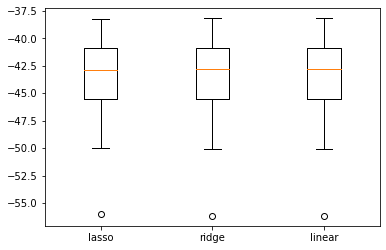

In [92]:
lasso_score = cross_val_score(lasso, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
ridge_score = cross_val_score(ridge, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
linear_score = cross_val_score(ridge, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
plt.boxplot((lasso_score, ridge_score, linear_score), labels=('lasso', 'ridge', 'linear'))
plt.show()

In [95]:
lasso_mse = []
ridge_mse = []
linear_mse = []

for train_index, test_index in cv.split(x) : 
    lasso.fit(X_train[train_index], y_train[train_index])
    ridge.fit(X_train[train_index], y_train[train_index])
    linear.fit(X_train[train_index], y_train[train_index])
    lasso_mse.append(mse(y_train[test_index], lasso.predict(X_train[test_index])))
    ridge_mse.append(mse(y_train[test_index], ridge.predict(X_train[test_index])))
    linear_mse.append(mse(y_train[test_index], linear.predict(X_train[test_index])))
                      
print(sum(lasso_mse)/10)
print(sum(ridge_mse)/10)
print(sum(linear_mse)/10)

KeyError: "None of [Int64Index([     1,      2,      4,      5,      6,      7,     11,     12,\n                13,     14,\n            ...\n            999989, 999990, 999991, 999992, 999993, 999994, 999995, 999996,\n            999997, 999998],\n           dtype='int64', length=900000)] are in the [columns]"

In [ ]:
lasso_score = cross_val_score(lasso, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
ridge_score = cross_val_score(ridge, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
linear_score = cross_val_score(ridge, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
plt.boxplot((lasso_score, ridge_score, linear_score), labels=('lasso', 'ridge', 'linear'))
plt.show()